<a href="https://colab.research.google.com/github/Gulayrose/DVwPy/blob/main/DVwPy_Assignment_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


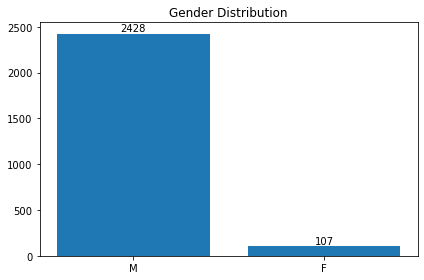

In [ ]:
# with matplotlib
a = kill["gender"].value_counts().index
a

b =  kill.groupby("gender")["gender"].count()[::-1]
b

fig, ax = plt.subplots()
plt.title("Gender Distribution")
ax.bar(a, b)

for x,y in zip(a, b):
    
    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout();


## 2: Plot 7 most common kill weapons

In [ ]:
kill_head = kill.armed.value_counts().head(7)
kill_head

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

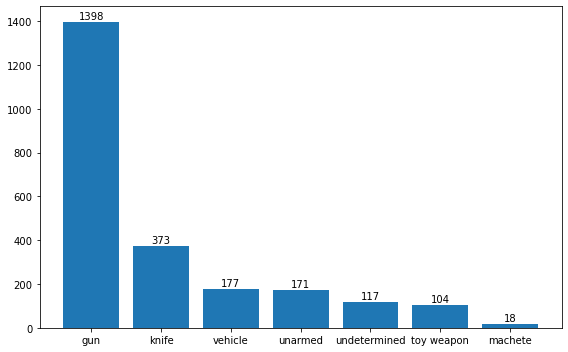

In [ ]:
# with matplotlib
kh = kill.armed.value_counts().head(7).index
kh

death = kill.armed.value_counts().head(7).values
death

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(kh,death)

for x,y in zip(kh,death):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout();

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
kill.age.fillna(0, inplace=True)
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                          0
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill["age_cat"] = kill.age
kill["age_cat"] = kill.age_cat.transform(lambda x: "above25" if x > 25 else "below25")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill.age_cat.value_counts() 

above25    1905
below25     630
Name: age_cat, dtype: int64

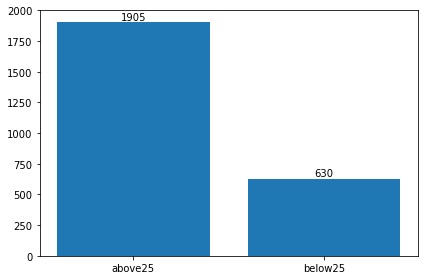

In [ ]:
# with matplotlib
x = kill.age_cat.value_counts().index
y = kill.age_cat.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y)

for x,y in zip(x, y):
    
    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,2),
                 ha='center')
plt.tight_layout();

## 4: Plot number of killed poeple by race

In [ ]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

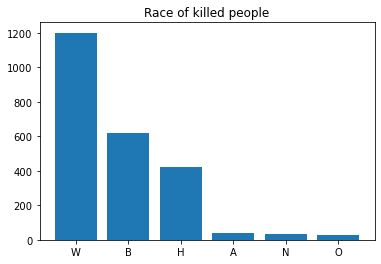

In [ ]:
# with matplotlib
x = kill.race.value_counts().index
y = kill.race.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y)
plt.title("Race of killed people");

## 5: Killed People According to Races (Pie Chart)

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [ ]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [ ]:
kill["age"] = kill["age"].replace(to_replace=[0,"nan"], value=np.nan)

In [ ]:
kill.dropna(inplace=True)

In [ ]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [ ]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [ ]:
kill.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

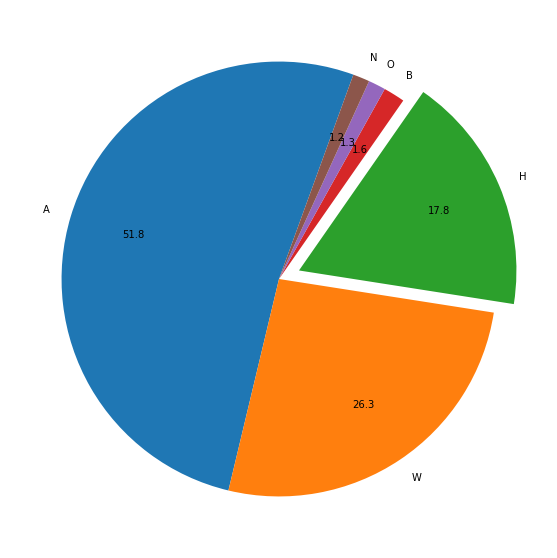

In [ ]:
# matplotlib
mylabels = ['A', 'W', 'H', 'B', 'O', 'N']

plt.figure(figsize=(20, 10))

y = kill.race.value_counts().values
mylabels = kill.race.unique()
myexplode = [0, 0, 0.1, 0, 0, 0]

plt.pie(y, 
        labels = mylabels,
        labeldistance=1.1, 
        autopct="%.1f", 
        startangle=70, 
        pctdistance=0.7, 
        explode=myexplode) 
plt.show();
